### WordSense: NLP-powered Auto-suggestion and Prediction System
In today's world of computers and phones, it's important to write clearly and correctly. That's where WordSense comes in—it's a cool new project that uses fancy technology called Natural Language Processing (NLP) to help you write better.

WordSense uses computer tricks like analyzing how often words are used and figuring out which words go together. It also checks for mistakes in spelling and suggests better words to use. It does all this using special computer programs called libraries, like textdistance and collections, which help it understand and work with words.

One cool thing WordSense does is fix mistakes in your writing. It looks at what you've written and tries to find the right words to use instead. It's like having a smart friend who helps you write better.

Another neat feature is that WordSense can suggest words that are similar to the ones you've typed. So if you make a small mistake, it can help you find the right word quickly.

Right now, WordSense is pretty awesome, but it wants to get even better. It's aiming to use even fancier technology in the future to make its suggestions even more accurate and helpful.

WordSense makes writing easier and better—making sure you say exactly what you mean. Come along on the WordSense journey and see how it can help you write like a pro!

### Task 1: Reading and Extracting Words from a Text File
Well done on starting your new project! In this task, we'll begin by reading a text file called "words.txt". Our goal is to extract all the words from this file. It's important to note that we'll convert all the words to lowercase to ensure consistency and avoid counting the same word multiple times due to case differences. We'll then create a set containing all unique words found in the file. As a quick check, we'll also display the first ten words from the file.

Let's get started and see what words we can find in "words.txt"!

In [1]:
#--- Import path from pathlib,re,counter from collections ---
from pathlib import Path
import re
from collections import Counter

#--- Read in text file (''words.txt'') ----
file_path = Path(r"C:\Users\Sanket Madane\OneDrive\Documents\words.txt")
file_content = file_path.read_text(encoding='utf-8')

words = re.findall(r'\w+', file_content.lower())
V = set(words)

# ---WRITE YOUR CODE FOR TASK 1 ---
ten_words = words[:10]

#--- Inspect data ---
ten_words

['ufeff', 'n', 'ntitle', 'moby', 'dice', 'or', 'the', 'whale', 'n', 'nauthor']

### Task 2: Counting Word Frequencies
Great job on extracting words from the text file! Now, let's count how often each word appears in the file. We'll create a dictionary to store the frequency of each word. Additionally, we'll find the ten most common words and display them.

Let's continue our exploration and see which words are the most frequent in the text file!

In [2]:
# --- WRITE YOUR CODE FOR TASK 2 ---
most_common_txt = {}
word_freq = Counter(words)
most_common_txt = word_freq.most_common()[:10]

#--- Inspect data ---
most_common_txt

[('the', 9814),
 ('of', 4816),
 ('and', 4216),
 ('a', 3490),
 ('to', 3260),
 ('n', 3232),
 ('in', 2933),
 ('that', 2091),
 ('his', 1732),
 ('it', 1655)]

### Task 3: Visualizing Top Word Frequencies
Good progress! Now, let's take our analysis a step further by visualizing the frequency of words in our text data. This will help us get a clear picture of which words are the most common.

Create a bar plot to display the top 20 most common words and their frequencies. This visual representation will make it easier to understand the distribution of words in our text.

Let's proceed and create a bar plot to visualize the frequencies of the top 20 most common words!

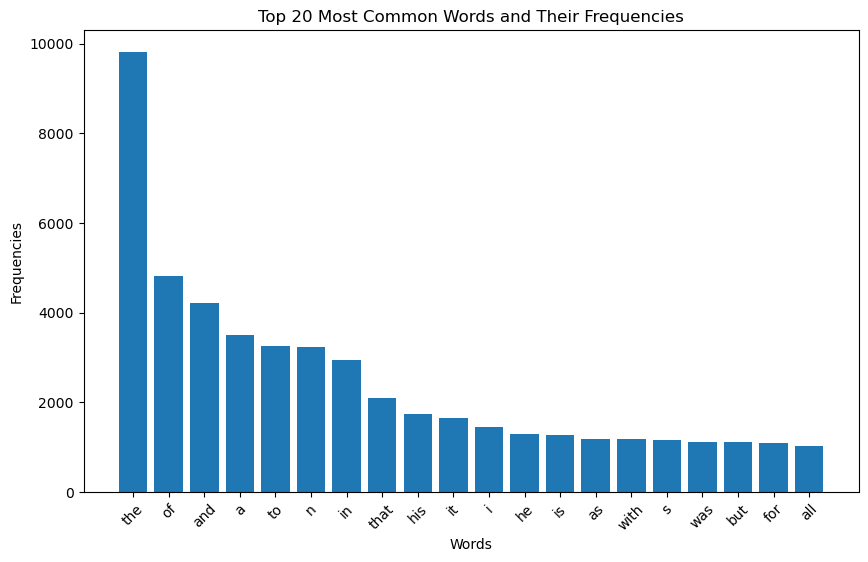

In [3]:
#--- Import matplotlib.pyplot as plts ---
import matplotlib.pyplot as plt

# --- WRITE YOUR CODE FOR TASK 3 ---
most_common_20 = word_freq.most_common(20)

words, frequencies = zip(*most_common_20)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 20 Most Common Words and Their Frequencies')
plt.xticks(rotation=45)

#--- Inspect data ---
plt.show()

### Task 4: Calculating Word Probabilities
Well done on your progress so far! Now, let's move on to calculating the probabilities of each word in our text data. This will help us understand the likelihood of encountering each word in the text.

We'll calculate the probability of each word by dividing its frequency by the total sum of word frequencies. This will give us a measure of how common or rare each word is relative to the entire text.

Let's proceed and calculate the probabilities of each word in our text data to gain further insights into their occurrences!

In [4]:
# --- WRITE YOUR CODE FOR TASK 4 ---
probs = {}

Total = sum(word_freq.values())

for word, freq in word_freq.items():
    probs[word] = freq / Total

#--- Inspect data ---
probs

{'ufeff': 6.197437979139424e-06,
 'n': 0.02003011954857862,
 'ntitle': 1.859231393741827e-05,
 'moby': 0.0003346616508735289,
 'dice': 0.0003346616508735289,
 'or': 0.0032412600630899184,
 'the': 0.06082165632727431,
 'whale': 0.005515719801434087,
 'nauthor': 1.2394875958278848e-05,
 'herman': 1.2394875958278848e-05,
 'melville': 1.2394875958278848e-05,
 'nrelease': 6.197437979139424e-06,
 'date': 6.197437979139424e-06,
 'december': 2.4789751916557697e-05,
 '25': 1.859231393741827e-05,
 '2008': 6.197437979139424e-06,
 'last': 0.0010287747045371444,
 'updated': 6.197437979139424e-06,
 '3': 3.098718989569712e-05,
 'n2017': 6.197437979139424e-06,
 'nlanguage': 6.197437979139424e-06,
 'english': 0.00016113338745762503,
 'ncharacter': 1.859231393741827e-05,
 'set': 0.00034085908885266833,
 'encoding': 6.197437979139424e-06,
 'utf': 6.197437979139424e-06,
 '8': 1.859231393741827e-05,
 'start': 0.0001797257013950433,
 'of': 0.029846861307535465,
 'this': 0.005776012196557943,
 'project': 2.4

### Task 5: Implementing Auto-correction Algorithm
Excellent work on your progress! Now, let's take our analysis a step further by building an autocorrect function. This function will help users correct any misspelled words they input.

We'll check if the input word is already in our vocabulary. If it is, we'll simply let the user know that the word seems to be correct. However, if the word is not in our vocabulary, we'll suggest some similar words based on their probability and similarity to the input word.

Let's proceed and build the autocorrect function to help users correct their misspelled words!

In [5]:
#--- import textdistance ---
import pandas as pd
import textdistance as td

# --- WRITE YOUR CODE FOR TASK 5 ---
def my_autocorrect(input_word):
    input_word = input_word.lower()

    if input_word in V:
        return 'Your word seems to be correct'
    else :     
        sim = [1-(td.Jaccard(qval=2).distance(v,input_word)) for v in word_freq.keys()]
        df = pd.DataFrame.from_dict(probs, orient='index').reset_index()
        df = df.rename(columns={'index':'Word', 0:'Prob'})
        df['Similarity'] = sim
        output = df.sort_values(['Similarity', 'Prob'], ascending=False).head()
        return(output)

        
suggestion_words = my_autocorrect('neverteless')
#--- Inspect data ---
suggestion_words
#suggestion_words

,Word,Prob,Similarity
2694,nevertheless,0.000198,0.750000
9107,nnevertheless,0.000068,0.692308
16489,boneless,0.000012,0.416667
15165,elevates,0.000006,0.416667
1101,never,0.000979,0.400000


In [6]:
#--- import textdistance ---
import pandas as pd
import textdistance as td

# --- WRITE YOUR CODE FOR TASK 5 ---
def my_autocorrect(input_word):
    input_word = input_word.lower()

    if input_word in V:
        return 'Your word seems to be correct'
    else :
        similarity_scores  = {}
        for word in word_freq.keys():
            similarity_scores[word] = td.Jaccard(qval=2).distance(input_word, word)
                
        df = pd.DataFrame({'Word': list(word_freq.keys()), 'Prob': list(probs.values()), 'Similarity': list(similarity_scores.values())})
        
        df = df.sort_values(by=['Similarity', 'Prob'], ascending=False)
        
        return df.head()


suggestion_words = my_autocorrect('neverteless')
#--- Inspect data ---
suggestion_words
#suggestion_words

,Word,Prob,Similarity
6,the,0.060822,1.0
28,of,0.029847,1.0
38,and,0.026128,1.0
48,a,0.021629,1.0
115,to,0.020204,1.0


### Task 6: Implementing Enhanced Correction Suggestions
Great job on your progress! Now, let's enhance our word correction function to provide better suggestions for misspelled words.

If the input word is already correct, we'll return the same word. However, if the word is not in our vocabulary, we'll suggest similar words based on their similarity to the input word. This time, we'll use a different method called Levenshtein distance to find similar words.

Let's proceed and improve our word correction function to provide better suggestions for misspelled words!

In [7]:
# --- WRITE YOUR CODE FOR TASK 6 ---

def correction_suggestion(word):
    word = word.lower()
    
    if word in V:
        return word
    else:
        suggestions = [w for w in V if td.levenshtein.normalized_similarity(word, w) > 0.8]
        
        return suggestions[0] if suggestions else None
    

result = correction_suggestion('kidness')
#--- Inspect data ---
result
#result

'kindness'